<a href="https://colab.research.google.com/github/cjk5642/SteelersChatVolatility/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
try:
  from textblob import TextBlob
except ModuleNotFoundError:
  !pip install textblob
  from textblob import TextBlob

import pandas as pd
data_url = "final_steelers_game_2022.csv"
steelers_data = pd.read_csv(data_url)

def extract_sentiment(x):
  s = TextBlob(x).sentiment
  polarity = s.polarity
  subjectivity = s.subjectivity
  return [polarity, subjectivity]

sentiments = pd.DataFrame(list(steelers_data['comment'].apply(lambda x: extract_sentiment(x))), columns = ['polarity', 'subjectivity'])
steelers_data = pd.concat([steelers_data, sentiments], axis = 1)
steelers_data['datetime'] = steelers_data['datetime'].apply(pd.to_datetime)
steelers_data['hour'] = steelers_data['datetime'].dt.hour
steelers_data['minute'] = steelers_data['datetime'].dt.minute
steelers_data = steelers_data.groupby(['hour', 'minute']).mean().reset_index()
steelers_data['hour'] %= 12
steelers_data['minute'] = steelers_data['minute'].apply(lambda x: f"0{x}" if len(str(x)) == 1 else x)
steelers_data['time'] = steelers_data['hour'].astype(str) + ':' + steelers_data['minute'].astype(str) + " PM"
steelers_data = steelers_data.drop(['hour', 'minute'], axis =1)

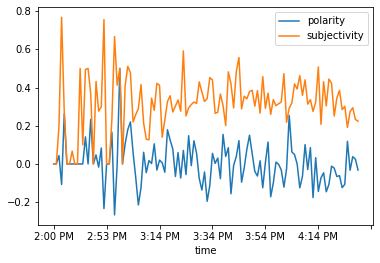

In [55]:
steelers_data.plot(x = 'time')